In [1]:
from __future__ import annotations

import dataclasses
import json
import pathlib

import cv2
import h5py
import hdf5plugin
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import tqdm
from rpg_e2vid.utils.inference_utils import events_to_voxel_grid

import const
import utils

In [2]:
def to_displayable(img, converted: int | None = cv2.COLOR_BGR2RGB) -> PIL.Image.Image:
    if converted is not None:
        img = cv2.cvtColor(img, converted)
    return PIL.Image.fromarray(np.clip(img.astype(np.uint8), 0, 255))


def showarray(img, converted: int | None = cv2.COLOR_BGR2RGB) -> None:
    display(to_displayable(img, converted))

In [ ]:
imgs = list(pathlib.Path("../data/processed/dsec/").glob("*.npy"))

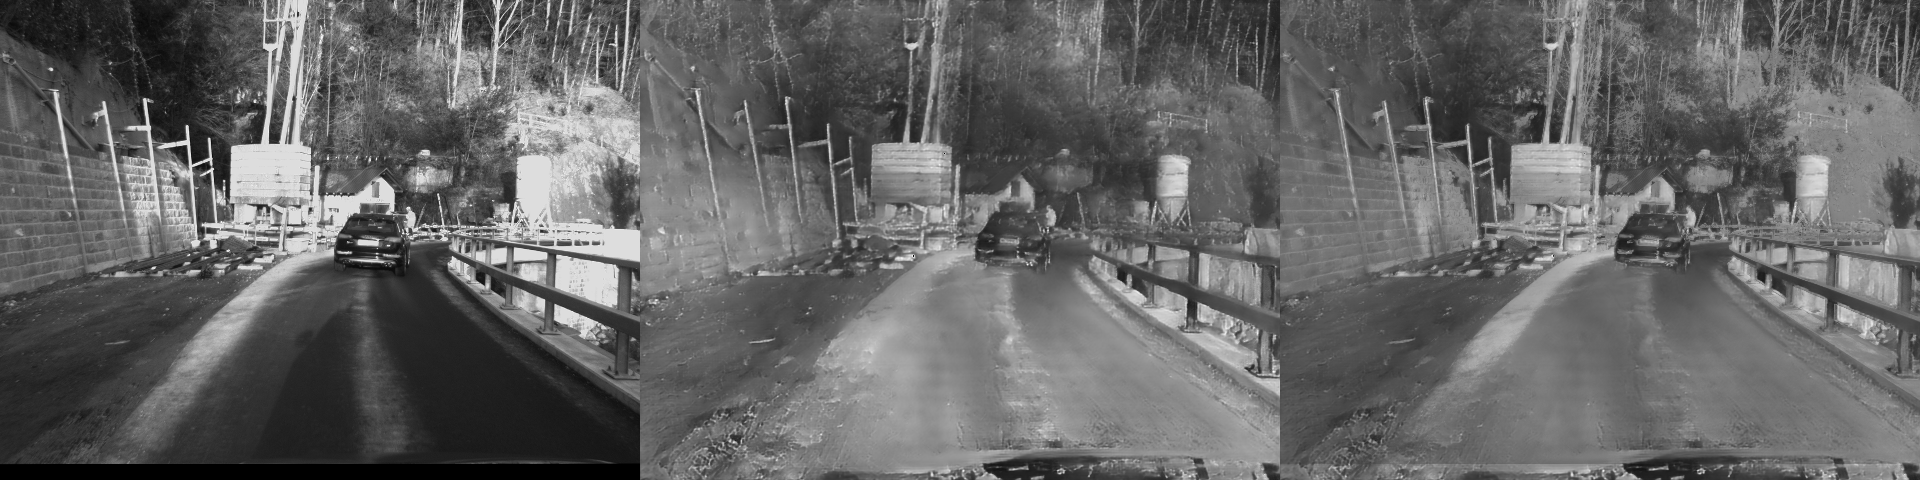

In [ ]:
sample = np.load(imgs[100])
sample_bgr = sample[:, :, :3]
sample_event = sample[:, :, 3]
sample_event_bgr = cv2.cvtColor(sample_event, cv2.COLOR_GRAY2BGR)

sample_iuv = cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2YUV)
sample_i = sample_iuv[:, :, 0] / 255.0
sample_adjusted = sample_iuv.copy()
sample_adjusted[:, :, 0] = sample_event

tau = 0.4
orig_weight = (0.5 - np.maximum(np.abs(sample_i - 0.5), tau - 0.5)) / (1 - tau)
event_weight = 1 - orig_weight

combined = ((sample_iuv[:, :, 0]) * orig_weight + sample_event * event_weight).astype(
    np.uint8
)

# alpha = 0.1
# showarray(sample_event * alpha + sample_iuv[:, :, 0] * (1 - alpha), None)
showarray(np.concatenate([sample_iuv[:, :, 0], sample_event, combined], axis=1), None)

In [61]:
sample_event * event_weight + sample_iuv[:, :, 0] * orig_weight

array([[ 90.80392157,  88.50980392,  84.7372549 , ...,  62.64705882,
         62.26666667,  67.64313725],
       [ 85.31764706,  79.3372549 ,  86.11764706, ...,  55.11764706,
         48.83529412,  57.61176471],
       [ 80.74901961,  79.3372549 ,  82.01176471, ...,  60.36470588,
         67.28235294,  63.02352941],
       ...,
       [ 93.        , 106.        , 111.        , ...,  45.        ,
         45.        ,  48.        ],
       [100.        , 107.        ,  97.        , ...,  46.        ,
         51.        ,  45.        ],
       [ 88.        ,  80.        ,  70.        , ...,  38.        ,
         48.        ,  50.        ]])